# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você. Quais são as características básicas da base?*

Ex: Estou trabalhando com o histório de vendas de um varejo e uma outra base do mesmo varejista das suas campanhas de marketing realizadas em veiculos de comunicação.

A base escolhida é de filmes - https://www.kaggle.com/rounakbanik/the-movies-dataset 

A base contém informações sobre 45.000 filmes em destaque no conjunto de dados Full MovieLens, lançados em ou antes de julho de 2017. 

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.
- Quais são suas hipoteses sobre os dados? O que vc espera descobrir com esse estudo?

Ex: Hipoteses válidas seriam:
- As pessoas fazem mais compras nos dias utéis ou finais de semana?
- Existe diferença entre o padrão de compra de segunda ou terça feira?
- O horário de pico influencia no padrão de compra dos clientes?
- Quais produtos são comprados mais juntos? Existe diferença se observarmos a idade do cliente?
- Qual o efeito de uma campanha de marketing nas vendas?


Hipóteses:
1 - Quais são os gêneros de filmes melhor avaliados?
2 - Existe relação dos filmes mais bem avaliados para a empresa que o produziu?
3 - Há influência dos idiomas disponíveis no filmes na avaliação dos filmes?

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [ ]:
# importando as bibliotecas utilizadas no projeto
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#%matplotlib inline
import seaborn as sns

In [113]:
# Leitura do dataset
filmes = pd.read_csv('C:/Users/Herica/Desktop/Herica/cursoIACD/bases/filmes/movies_metadata.csv')

In [ ]:
# Pré-visaulização do dataset
filmes.head(1)

In [ ]:
# tamanho da nossa base
print('Número de linhas e número de colunas:', filmes.shape)

In [ ]:
filmes.describe()

In [ ]:
filmes.dtypes

--------------------------- TRATAMENTO DE DADOS NULOS ---------------------

In [114]:
# fazendo uma cópia do dataset para ser trabalhado
df = filmes.copy()

In [ ]:
# quantidade de elementos nulos
df.isnull().sum()

In [ ]:
# PERCENTUAL DE ELEMENTOS NULOS
round(df.isnull().mean() * 100,2)

In [115]:
#dropar colunas consideradas irrelevantes na primeira análise ou que possuem muitos valores nulos
df.drop(['belongs_to_collection'],axis = 1, inplace = True)
df.drop(['homepage'],axis = 1, inplace = True)
df.drop(['poster_path'],axis = 1, inplace = True)     
df.drop(['tagline'],axis = 1, inplace = True)     

In [116]:
# REMOVE ELEMENTOS QUE POSSUEM DADOS NULOS
df = df.dropna()

In [117]:
# resetando os índices
df = df.reset_index()

In [ ]:
# validando se ainda há registros nulos
df.isnull().sum()

-------------------- RENOMEANDO AS FEATURES --------------------------

In [118]:
# renomear as coluna e usar todas com caixa baixa para padronizar
df = df.rename(columns={'adult': "classificacao", 'budget': 'despesas', 'genres': 'genero', 'original_language': 'lingua_original', 'original_title': 'titulo_original', 'overview': 'descricao', 'popularity': 'popularidade', 'production_companies': 'cia_producao', 'production_countries': 'pais_producao', 'release_date': 'data_lancamento', 'revenue': 'receita', 'runtime': 'duracao', 'spoken_languages': 'idiomas_falados', 'title': 'titulo', 'vote_average': 'media_votos', 'vote_count': 'qtde_votos','video': 'video'})

In [ ]:
# ------------------------ DESCRIÇÃO DAS FEATURES --------------------
# descrição das features
'adulto' - se o filme é exclusivo para adulto ou não 
'despesas' - valor gasto na produção e divulgação dos vídeos
'genero' - quais são os gênceros do filme. Um filme pode ter um ou gêneros
'id' - número que identifica o filme
'imdb_id' - número unico que identifica o filme na base do imdb
'lingua_original' - qual é o idioma original do filme. 
'titulo_original' - titulo original do filme
'descricao' - descrição do filme
'popularidade' - qual é a popularidade do filme
'cia_producao' - qual(is) foi a companhia(s) que produziu o filme. 
'pais_producao' - quais foram os países onde os filmes foram gravados
'data_lancamento' - qual foi a data de lançamento do filme
'receita' -  qual foi a receita obtida com o filme
'duracao' - qual é a duração do filme em minutos
'idiomas_falados' - quais são os idiomas falados no filme. 
'status' - status do filmes. 
'slogan' - qual é o slogan do filme.
'titulo' - qual é o título do filme
'video' - se tem o video ou não do traile
'media_votos' - qual é a média de votos dada pelos usuários
'qtde_votos' - qual foi a quantidade de votos

# Tipos de features e seus possíveis valores
A) Variáveis categóricas - O dataset contém 8 variáveis:
1 - adulto - contém dois valores: 'false' = 1, 'true' = 0
2 - genero -  contém 29 valores possíveis. Cada registro foi transformado em feature
3 - lingua_original -possui 90 valores possíveis.
4 - cia_producao   - possui 19368 valores possíveis.
5 - pais_producao  - 155 valores possíveis.
6 - idiomas_falado - 73 valores possíveis.
7 - status - 'Released', nan, 'Rumored', 'Post Production', 'In Production', 'Planned', 'Canceled'          
8 - video - False, True, nan

B) Variáveis discretas - O dataset contém 13 variáveis: 
despesas, id, imdb_id, titulo_original, descricao,data_lancamento,popularidade,  
receita, duracao(minutos), slogan, titulo, media_votos, qtde_votos          

################ Feature adult #############

In [119]:
# TRANSFORMANDO A FEATURE "adult" EM BINÁRIO, ONDE 'True' = 0 (classificação livre) e 'False' = 1 (são somente para adultos)
df["classificacao"] = df["classificacao"].apply(lambda x: 1 if x == "False" else 0)

In [ ]:
# VALIDANDO TRANSFORMAÇÃO da feature "adult"
df[["classificacao", "adult","original_title"]].head(3)

In [127]:
#print (df.groupby('classificacao').sum())
print (df.classificacao.value_counts(normalize=True))

1    0.99982
0    0.00018
Name: classificacao, dtype: float64


Text(0.5, 1.0, 'Qtde de classificação')

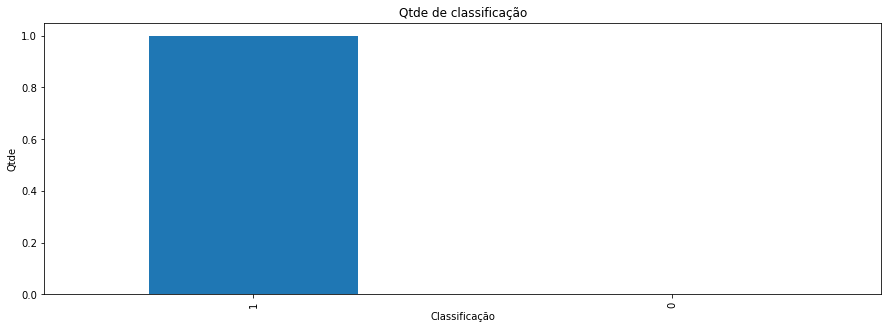

In [133]:
# visualizando A quantidade de registros por classificação
df.classificacao.value_counts(normalize=True).plot.bar()

plt.ylabel('Qtde')
plt.xlabel('Classificação')
plt.title('Classificação por quantidade')

In [135]:
# retirada da feature classificacao
df = df[['despesas', 'genero', 'id', 'imdb_id',
       'lingua_original', 'titulo_original', 'descricao', 'popularidade',
       'cia_producao', 'pais_producao', 'data_lancamento', 'receita',
       'duracao', 'idiomas_falados', 'status', 'titulo', 'video',
       'media_votos', 'qtde_votos']]

Como 99% dos registro tem a classificação 1 (livre), a a feature foi considerada irrelevante e excluída da análise

In [151]:
df.cia_producao

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
44344    [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...
44345        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
44346    [{'iso_3166_1': 'US', 'name': 'United States o...
44347             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
44348     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: pais_producao, Length: 44349, dtype: object

------------- Transformar as features que são um dicionário em uma lista --------------

- gênero
- pais_producao
- cia_producao

In [ ]:
######## Feature gênero ############

In [136]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['genero'] = df['genero'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos gêneros, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_genero'] = df['genero'].apply(get_list) #O retorno será uma lista com todos os gêneros. quando coloco uma coluna que não existe, ele cria a coluna automaticamente

# VALIDANDO TRANSFORMAÇÃO
df[["novo_genero", "genero", "titulo_original"]].head(3)

,novo_genero,genero,titulo_original
0,"[Animation, Comedy, Family]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,"[Adventure, Fantasy, Family]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,"[Romance, Comedy]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men


In [137]:
# Criar uma lista que contenha somente valores únicos de gênero, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_genero)        
generos_unicos = [] # lista onde será incluídos os gêneros únicos
x = 0 
#print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    generos = df.novo_genero[x]
    #print ("P/ x = {} todos os generos são {}:".format(x,generos))
    tam_generos = len(generos)
    #print ("tam_generos: ", tam_generos)
    i = z = 0
    while (i < tam_generos): # enquanto o registro tiver generos
        cada_genero_registo = df.novo_genero[x][i]
        #print ("Para x = {} e i = {} os genero é {} ". format(x, i ,cada_genero_registo))
        if (not cada_genero_registo in generos_unicos): # verifica se o genero está na lista de generos únicos
            generos_unicos.append(cada_genero_registo) # inclui o genero na lista de generos únicos
            #print ("lista com os generos únicos", generos_unicos)
            z +=1
        i += 1        
    x += 1


print ("generos únicos: ", len(generos_unicos))
print (generos_unicos)

generos únicos:  20
['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']


In [138]:
# transformar as opções possíveis de genero em features com conteúdo true ou false 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
te = TransactionEncoder()
genero_x = te.fit(df.novo_genero).transform(df.novo_genero)
df_novo = pd.DataFrame(genero_x, columns=te.columns_)

In [139]:
# resetando os índices
df_novo = df_novo.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo], axis=1)

In [140]:
# copiando o conteúdo do novo dataframe para o filme utilizado
df = horizontal_stack.copy()

In [141]:
# após a transformação do conteúdo da feature genero para novas features, o data set ficou com as seguintes colunas: 
df.columns

Index(['despesas', 'genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'novo_genero', 'index', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [142]:
# renomear as colunas de genero e usar todas com caixa baixa para padronizar
df = df.rename(columns={'Action': "acao", 'Adventure': 'aventura', 'Animation': 'animacao', 'Comedy': 'comedia', 'Crime': 'crime', 'Documentary': 'documentario', 'Drama': 'drama', 'Family': 'familia', 'Fantasy': 'fantasia', 'Foreign': 'estrangeiro', 'History': 'historia', 'Horror': 'horror', 'Music': 'musical', 'Mystery': 'misterio', 'Romance': 'romance', 'Science Fiction': 'ficcao_cientifica', 'TV Movie': 'filmes_tv', 'Thriller': 'suspense', 'War': 'gerra', 'Western': 'ocidental'})


In [145]:
print ('Features após transformação do genero', df.columns)

Features após transformação do genero Index(['despesas', 'genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'novo_genero', 'index', 'acao', 'aventura', 'animacao',
       'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia',
       'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance',
       'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental'],
      dtype='object')


In [146]:
print ('acao\n', df.acao.value_counts(normalize=True))
print ('aventura\n', df.aventura.value_counts(normalize=True))
print ('animacao\n', df.animacao.value_counts(normalize=True))
print ('comedia\n', df.comedia.value_counts(normalize=True))
print ('documentario\n', df.documentario.value_counts(normalize=True))
print ('familia\n', df.familia.value_counts(normalize=True))
print ('romance\n', df.romance.value_counts(normalize=True))
print ('ficcao_cientifica\n', df.ficcao_cientifica.value_counts(normalize=True))
print ('filmes_tv\n', df.filmes_tv.value_counts(normalize=True))
print ('suspense\n', df.suspense.value_counts(normalize=True))
print ('gerra\n', df.gerra.value_counts(normalize=True))
print ('ocidental\n', df.ocidental.value_counts(normalize=True))

acao
 False    0.854788
True     0.145212
Name: acao, dtype: float64
aventura
 False    0.925184
True     0.074816
Name: aventura, dtype: float64
animacao
 False    0.957316
True     0.042684
Name: animacao, dtype: float64
comedia
 False    0.715709
True     0.284291
Name: comedia, dtype: float64
documentario
 False    0.913211
True     0.086789
Name: documentario, dtype: float64
familia
 False    0.947056
True     0.052944
Name: familia, dtype: float64
romance
 False    0.864101
True     0.135899
Name: romance, dtype: float64
ficcao_cientifica
 False    0.943854
True     0.056146
Name: ficcao_cientifica, dtype: float64
filmes_tv
 False    0.985231
True     0.014769
Name: filmes_tv, dtype: float64
suspense
 False    0.856164
True     0.143836
Name: suspense, dtype: float64
gerra
 False    0.974768
True     0.025232
Name: gerra, dtype: float64
ocidental
 False    0.979391
True     0.020609
Name: ocidental, dtype: float64


In [147]:
# contabilizando a qtde de registros true de cada gênero
lista_generos = ['acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental']

tam = len(lista_generos)
print ("total de generos", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    genero = lista_generos[x]
    total_genero = sum(df[genero] == True)    
    print ('genero: ', genero, '|',total_genero)
    x += 1
    lista_totais.append (total_genero)

total de generos 20
genero:  acao | 6440
genero:  aventura | 3318
genero:  animacao | 1893
genero:  comedia | 12608
genero:  crime | 3926
genero:  documentario | 3849
genero:  drama | 19680
genero:  familia | 2348
genero:  fantasia | 1987
genero:  estrangeiro | 1280
genero: historia | 1246
genero:  horror | 4513
genero:  musical | 1489
genero:  misterio | 2082
genero:  romance | 6027
genero:  ficcao_cientifica | 2490
genero:  filmes_tv | 655
genero:  suspense | 6379
genero: gerra | 1119
genero:  ocidental | 914


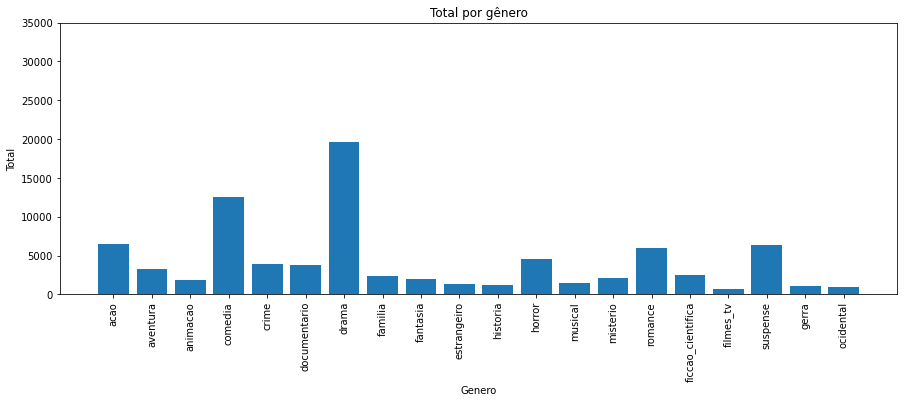

In [148]:
#plotando os totais por generos
plt.bar(lista_generos, lista_totais)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 35000)

plt.xticks(rotation=90)

plt.xlabel("Genero")
plt.ylabel("Total")
plt.title("Total por gênero")

plt.show()

São 20 os tipos de gênero. Um filme tem no mínimo um gênero.
Conforme observamos os generos mais comuns são: drama, comédia, ação, suspense e romance.

######## Feature pais_producao ############

In [ ]:
 df['pais_producao'].head()

In [ ]:
type(df.pais_producao)

In [154]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['pais_producao'] = df['pais_producao'].apply(literal_eval) # verifica se todos os dados são do mesmo tipo
#Função para pegar os nomes dos paises, caso exista.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_pais_producao'] = df['pais_producao'].apply(get_list) #O retorno será uma lista com todos os paises. quando coloco uma coluna que não existe, ele cria a coluna automaticamente


df[["novo_pais_producao", "pais_producao", "titulo_original"]].head(3)

,novo_pais_producao,pais_producao,titulo_original
0,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Toy Story
1,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Jumanji
2,[United States of America],"[{'iso_3166_1': 'US', 'name': 'United States o...",Grumpier Old Men


In [155]:
# Criar uma lista que contenha somente valores únicos do pais de produção, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_pais_producao)        
pais_producao_unicos = [] # lista onde será incluídos os países de produção únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    pais = df.novo_pais_producao[x]
    tam_pais = len(pais)
    i = z = 0
    while (i < tam_pais): # enquanto o registro tiver paises de produção
        cada_pais_registo = df.novo_pais_producao[x][i]
        if (not cada_pais_registo in pais_producao_unicos): # verifica se o pais de produção está na lista de paises únicos
            pais_producao_unicos.append(cada_pais_registo) # inclui o pais na lista de paises únicos
            z +=1
        i += 1        
    x += 1

print ("pais_producao_unicos: ", len(pais_producao_unicos))
print (pais_producao_unicos)

total de registros do dataset:  44349
pais_producao_unicos:  155
['United States of America', 'Germany', 'United Kingdom', 'France', 'Italy', 'Spain', 'China', 'Australia', 'South Africa', 'Canada', 'Switzerland', 'Belgium', 'Japan', 'Iran', 'Netherlands', 'Hong Kong', 'Tunisia', 'Dominican Republic', 'Croatia', 'Russia', 'Macedonia', 'Austria', 'Ireland', 'Taiwan', 'New Zealand', 'Mexico', 'Poland', 'Peru', 'Cuba', 'Liechtenstein', 'Denmark', 'Finland', 'Sweden', 'Argentina', 'Iceland', 'South Korea', 'Serbia', 'India', 'Brazil', 'Greece', 'Congo', 'Senegal', 'Burkina Faso', 'Romania', 'Hungary', 'Philippines', 'Czech Republic', 'Vietnam', 'Trinidad and Tobago', 'Chile', 'Portugal', 'Norway', 'Kazakhstan', 'Georgia', 'Luxembourg', 'Ukraine', 'Botswana', 'Aruba', 'Israel', 'Turkey', 'Ecuador', 'Lebanon', 'Morocco', 'Bosnia and Herzegovina', 'Bahamas', 'Malaysia', 'Bhutan', 'Bulgaria', 'Jamaica', 'Pakistan', 'Nepal', "Cote D'Ivoire", 'Thailand', 'Namibia', 'Cameroon', 'Colombia', 'Czech

In [ ]:
df.novo_pais_producao.head(3)

In [156]:
# transformar as opções possíveis de pais de gravação em features com conteúdo true ou false 
pais_producao_x = te.fit(df.novo_pais_producao).transform(df.novo_pais_producao)
df_novo_pais_producao = pd.DataFrame(pais_producao_x, columns=te.columns_)

# resetando os índices
df_novo_pais_producao = df_novo_pais_producao.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df_novo_pais_producao], axis=1)

# copiando o conteúdo do novo dataframe para o filme utilizado
dataset = horizontal_stack.copy()

In [157]:
# a coluna index será excluída
dataset.drop(['index'],axis = 1, inplace = True)
df_novo_pais_producao.drop(['index'],axis = 1, inplace = True)

In [161]:
# contabilizando a qtde de registros true de cada pais de gravação
lista_pais = df_novo_pais_producao.columns
print (lista_pais)
tam = len(lista_pais)
print ("total de pais", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada genero
#print (type (lista_totais))

while x < tam:
    pais = lista_pais[x]
    total_pais = sum(df_novo_pais_producao[pais] == True)    
    print ('pais: ', pais, '|',total_pais)
    x += 1
    lista_totais.append (total_pais)

lista_pais_producao = list(zip(lista_totais,lista_pais))

del(lista_pais_producao[0]) # excluindo o valor index

print (lista_pais_producao)

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom',
       'United States Minor Outlying Islands', 'United States of America',
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yugoslavia',
       'Zimbabwe'],
      dtype='object', length=155)
total de pais 155
pais:  Afghanistan | 8
pais:  Albania | 4
pais:  Algeria | 11
pais:  Angola | 3
pais:  Argentina | 239
pais:  Armenia | 8
pais:  Aruba | 6
pais:  Australia | 564
pais:  Austria | 190
pais:  Azerbaijan | 2
pais:  Bahamas | 5
pais:  Bangladesh | 2
pais:  Barbados | 1
pais:  Belarus | 9
pais:  Belgium | 407
pais:  Bermuda | 1
pais:  Bhutan | 4
pais:  Bolivia | 10
pais:  Bosnia and Herzegovina | 35
pais:  Botswana | 3
pais:  Brazil | 276
pais:  Brunei Darussalam | 1
pais:  Bulgaria | 51
pais:  Burkina Faso | 10
pais:  Cambodia | 9
pais:  Cameroon | 5
pais:  Canada | 1737
pais:  Cayman Isl

In [162]:
# ordenando e revertendo a ordenação
lista_pais_producao.sort(reverse=True)

# obtendo os 10 mais frequentes países
lista_pais_producao[0:10]

[(20903, 'United States of America'),
 (3947, 'United Kingdom'),
 (3737, 'France'),
 (2083, 'Germany'),
 (1919, 'Italy'),
 (1737, 'Canada'),
 (1624, 'Japan'),
 (875, 'Spain'),
 (870, 'Russia'),
 (818, 'India')]

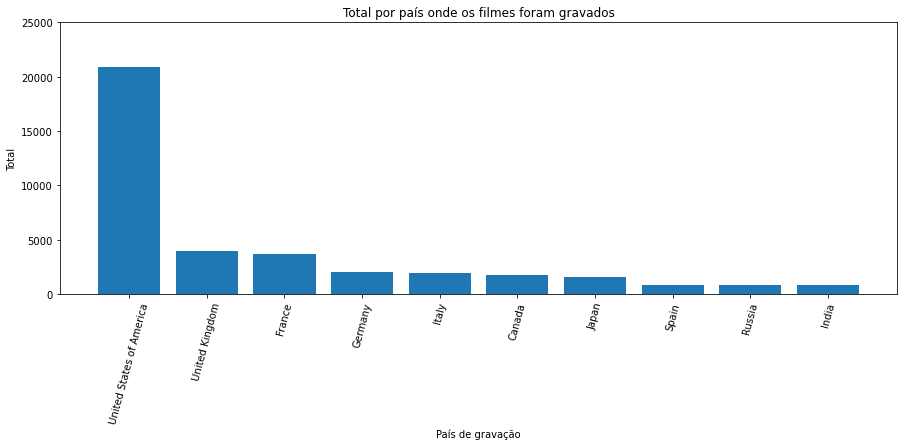

In [163]:
#plotando os 10 mais frequentes paises de gravação
x = [v[1] for v in lista_pais_producao[0:10]]
y = [v[0] for v in lista_pais_producao[0:10]]

plt.bar(x, y)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 25000)

plt.xticks(rotation=75)

plt.xlabel("País de gravação")
plt.ylabel("Total")
plt.title("Total por país onde os filmes foram gravados")

plt.show()

Observamos que os 10 países onde mais se grava filmes são:
(20903, 'United States of America'),
 (3947, 'United Kingdom'),
 (3737, 'France'),
 (2083, 'Germany'),
 (1919, 'Italy'),
 (1737, 'Canada'),
 (1624, 'Japan'),
 (875, 'Spain'),
 (870, 'Russia'),
 (818, 'India')

################# Feature idiomas_falados ################

In [195]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['idiomas_falados'] = df['idiomas_falados'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_idiomas_falados'] = df['idiomas_falados'].apply(get_list) 

# VALIDANDO TRANSFORMAÇÃO
df[["novo_idiomas_falados", "idiomas_falados", "titulo_original"]].head(3)

ValueError: malformed node or string: [{'iso_639_1': 'en', 'name': 'English'}]

In [196]:
# Criar uma lista que contenha somente valores únicos de linguas, para idêntificá-los e contabilizá-los
# # existem registros com valores '??????' e '?????' (Turkic), estes NÃO ESTÃO SENDO TRATADOS ????????????????????????????????????????????????????????????????????????????????????????????????????? 
# https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

todos_registros = len(df.novo_idiomas_falados)        
idiomas_falados_unicos = [] # lista onde será incluídos os linguas únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros): # enquanto tiver registros no dataset
    #print ("x:", x)
    idiomas = df.novo_idiomas_falados[x]
    tam_idiomas = len(idiomas)
    i = z = b = 0
    while (i < tam_idiomas): # enquanto o registro tiver linguas
        cada_idioma_registo = df.novo_idiomas_falados[x][i]
        if (not cada_idioma_registo in idiomas_falados_unicos): # verifica se a lingua está na lista
            if (cada_idioma_registo != '??????') and (cada_idioma_registo != '?????'):               
                idiomas_falados_unicos.append(cada_idioma_registo) # inclui na lista de linguas unicas
            z +=1
        i += 1        
    x += 1

print ("idiomas_falados_unicos: ", len(idiomas_falados_unicos))
print (idiomas_falados_unicos)

total de registros do dataset:  44349
idiomas_falados_unicos:  73
['English', 'Français', 'Español', 'Deutsch', 'Pусский', 'Latin', 'Nederlands', '广州话 / 廣州話', '普通话', 'shqip', 'Italiano', '한국어/조선말', 'Magyar', 'فارسی', 'Dansk', '日本語', 'العربية', 'Hrvatski', 'Bosanski', '', 'Română', 'Bahasa indonesia', 'Bahasa melayu', 'svenska', 'עִבְרִית', 'Český', 'Polski', 'Gaeilge', 'Norsk', 'Slovenčina', 'Tiếng Việt', 'Português', 'हिन्दी', 'Català', 'Íslenska', 'Afrikaans', 'বাংলা', 'Srpski', 'Wolof', 'Cymraeg', 'Latviešu', 'Kiswahili', 'ελληνικά', 'Türkçe', 'ภาษาไทย', 'suomi', 'Esperanto', 'български език', 'Український', 'ქართული', 'Bokmål', 'No Language', 'Azərbaycan', 'Malti', 'اردو', 'isiZulu', 'Bamanankan', 'Somali', 'ਪੰਜਾਬੀ', 'беларуская мова', 'தமிழ்', 'Galego', 'Kinyarwanda', 'қазақ', 'پښتو', 'Eesti', 'Lietuvi\x9akai', 'Slovenščina', 'తెలుగు', 'euskera', 'Fulfulde', 'ozbek', 'Hausa']


In [197]:
# transformar as opções possíveis de pais de gravação em features com conteúdo true ou false 
idiomas_falados_x = te.fit(df['novo_idiomas_falados']).transform(df['novo_idiomas_falados'])
df_novo_idiomas_falados = pd.DataFrame(idiomas_falados_x, columns=te.columns_)

# resetando os índices
df_novo_idiomas_falados = df_novo_idiomas_falados.reset_index()

# Mesclado os dois dataframes
horizontal_stack = pd.concat([df, df['novo_idiomas_falados']], axis=1)

# copiando o conteúdo do novo dataframe para o filme utilizado
dataset = horizontal_stack.copy()

In [198]:
# a coluna index será excluída
dataset.drop(['index'],axis = 1, inplace = True)
df_novo_idiomas_falados.drop(['index'],axis = 1, inplace = True)

In [200]:
# contabilizando a qtde de registros true de cada pais de gravação
lista_idiomas = df_novo_idiomas_falados.columns
print (lista_idiomas)
tam = len(lista_idiomas)
print ("total de idiomas", tam)
x = 0
lista_totais = [] # lista para armazenar os valores totais de cada idioma
#print (type (lista_totais))

while x < tam:
    idiomas = lista_idiomas[x]
    total_idiomas = sum(df_novo_idiomas_falados[idiomas] == True)    
    print ('idiomas: ', idiomas, '|',total_idiomas)
    x += 1
    lista_totais.append (total_idiomas)

lista_total_idiomas_producao = list(zip(lista_totais,lista_idiomas))

del(lista_total_idiomas_producao[0]) # excluindo o valor index

print (lista_total_idiomas_producao)

Index(['', '?????', '??????', 'Afrikaans', 'Azərbaycan', 'Bahasa indonesia',
       'Bahasa melayu', 'Bamanankan', 'Bokmål', 'Bosanski', 'Català',
       'Cymraeg', 'Dansk', 'Deutsch', 'Eesti', 'English', 'Español',
       'Esperanto', 'Français', 'Fulfulde', 'Gaeilge', 'Galego', 'Hausa',
       'Hrvatski', 'Italiano', 'Kinyarwanda', 'Kiswahili', 'Latin', 'Latviešu',
       'Lietuvikai', 'Magyar', 'Malti', 'Nederlands', 'No Language', 'Norsk',
       'Polski', 'Português', 'Pусский', 'Română', 'Slovenčina', 'Slovenščina',
       'Somali', 'Srpski', 'Tiếng Việt', 'Türkçe', 'Wolof', 'euskera',
       'isiZulu', 'ozbek', 'shqip', 'suomi', 'svenska', 'Íslenska', 'Český',
       'ελληνικά', 'Український', 'беларуская мова', 'български език', 'қазақ',
       'עִבְרִית', 'اردو', 'العربية', 'فارسی', 'پښتو', 'हिन्दी', 'বাংলা',
       'ਪੰਜਾਬੀ', 'தமிழ்', 'తెలుగు', 'ภาษาไทย', 'ქართული', '广州话 / 廣州話', '日本語',
       '普通话', '한국어/조선말'],
      dtype='object')
total de idiomas 75
idiomas:   | 421
idioma

In [205]:
#'?????', '??????'
del(lista_total_idiomas_producao[0:2])
lista_total_idiomas_producao

[(28, 'Afrikaans'),
 (4, 'Azərbaycan'),
 (37, 'Bahasa indonesia'),
 (15, 'Bahasa melayu'),
 (6, 'Bamanankan'),
 (3, 'Bokmål'),
 (30, 'Bosanski'),
 (35, 'Català'),
 (7, 'Cymraeg'),
 (298, 'Dansk'),
 (2443, 'Deutsch'),
 (48, 'Eesti'),
 (28537, 'English'),
 (2176, 'Español'),
 (7, 'Esperanto'),
 (3999, 'Français'),
 (2, 'Fulfulde'),
 (20, 'Gaeilge'),
 (4, 'Galego'),
 (1, 'Hausa'),
 (50, 'Hrvatski'),
 (2071, 'Italiano'),
 (3, 'Kinyarwanda'),
 (18, 'Kiswahili'),
 (110, 'Latin'),
 (19, 'Latviešu'),
 (24, 'Lietuvi\x9akai'),
 (328, 'Magyar'),
 (2, 'Malti'),
 (316, 'Nederlands'),
 (316, 'No Language'),
 (156, 'Norsk'),
 (471, 'Polski'),
 (537, 'Português'),
 (1403, 'Pусский'),
 (116, 'Română'),
 (19, 'Slovenčina'),
 (19, 'Slovenščina'),
 (8, 'Somali'),
 (92, 'Srpski'),
 (52, 'Tiếng Việt'),
 (197, 'Türkçe'),
 (12, 'Wolof'),
 (15, 'euskera'),
 (15, 'isiZulu'),
 (2, 'ozbek'),
 (28, 'shqip'),
 (331, 'suomi'),
 (497, 'svenska'),
 (56, 'Íslenska'),
 (275, 'Český'),
 (198, 'ελληνικά'),
 (41, 'Українсь

In [206]:
# ordenando e revertendo a ordenação
lista_total_idiomas_producao.sort(reverse=True)

# obtendo os 10 mais frequentes países
lista_total_idiomas_producao[0:10]

[(28537, 'English'),
 (3999, 'Français'),
 (2443, 'Deutsch'),
 (2176, 'Español'),
 (2071, 'Italiano'),
 (1708, '日本語'),
 (1403, 'Pусский'),
 (718, '普通话'),
 (699, 'हिन्दी'),
 (537, 'Português')]

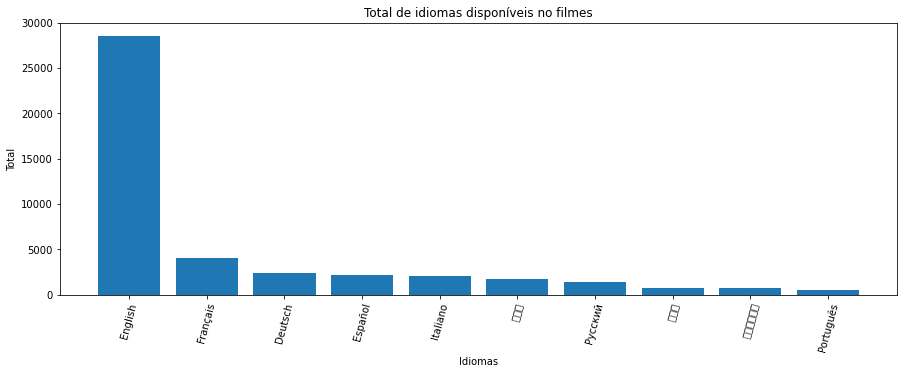

In [208]:
#plotando os 10 mais frequentes paises de gravação
x = [v[1] for v in lista_total_idiomas_producao[0:10]]
y = [v[0] for v in lista_total_idiomas_producao[0:10]]

plt.bar(x, y)

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 30000)

plt.xticks(rotation=75)

plt.xlabel("Idiomas")
plt.ylabel("Total")
plt.title("Total de idiomas disponíveis no filmes")

plt.show()

Observamos que os idiomas mais frequentes são:
(28537, 'English'),
 (3999, 'Français'),
 (2443, 'Deutsch'),
 (2176, 'Español'),
 (2071, 'Italiano')

############### Feature cia_producao ######################

In [170]:
# Recupera os dados da feature e salva numa nova coluna
from ast import literal_eval
df['cia_producao'] = df['cia_producao'].apply(literal_eval) 
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []
df['novo_cia_producao'] = df['cia_producao'].apply(get_list) 

# VALIDANDO TRANSFORMAÇÃO
df[["novo_cia_producao", "cia_producao", "titulo_original"]].head(3)

,novo_cia_producao,cia_producao,titulo_original
0,[Pixar Animation Studios],"[{'name': 'Pixar Animation Studios', 'id': 3}]",Toy Story
1,"[TriStar Pictures, Teitler Film, Interscope Co...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Jumanji
2,"[Warner Bros., Lancaster Gate]","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Grumpier Old Men


In [171]:
# Criar uma lista que contenha somente valores únicos de cia, para idêntificá-los e contabilizá-los
todos_registros = len(df.novo_cia_producao)        
cia_unicos = [] # lista onde será incluídos os cia únicos
x = 0 
print ('total de registros do dataset: ', todos_registros)
while (x < todos_registros):
    cia = df.novo_cia_producao[x]
    tam_cia = len(cia)
    i = z = b = 0
    while (i < tam_cia): 
        cada_cia_registo = df.novo_cia_producao[x][i]
        if (not cada_cia_registo in cia_unicos):      
            cia_unicos.append(cada_cia_registo)
            z +=1
        i += 1        
    x += 1

print ("cia_unicos: ", len(cia_unicos))
#print (cia_unicos)

total de registros do dataset:  44349
cia_unicos:  19368


In [ ]:
Não consegui contabilizar os valores mais frequentes da feature devido a erro de memoria.
???????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

Tratamento das demais features

In [ ]:
# verificando os valores da feature status
df.status.unique()

In [179]:
df.status.value_counts()

Released           44010
Rumored              214
Post Production       96
In Production         16
Planned               12
Canceled               1
Name: status, dtype: int64

In [180]:
# Avaliação dos valores 'In Production', Planned' e 'Canceled'
# após análise, os valores serão mantidos
select = df.status == 'Canceled'
df[select]

,despesas,genero,id,imdb_id,lingua_original,titulo_original,descricao,popularidade,cia_producao,pais_producao,...,misterio,romance,ficcao_cientifica,filmes_tv,suspense,gerra,ocidental,novo_pais_producao,novo_idiomas_falados,novo_cia_producao
39557,0,[],64109,tt0356982,en,Paanch,"The film is ""loosely"" based on the 1976-77 Jos...",0.189724,[],[],...,False,False,False,False,False,False,False,[],[हिन्दी],[]


Text(0.5, 1.0, 'Total por status')

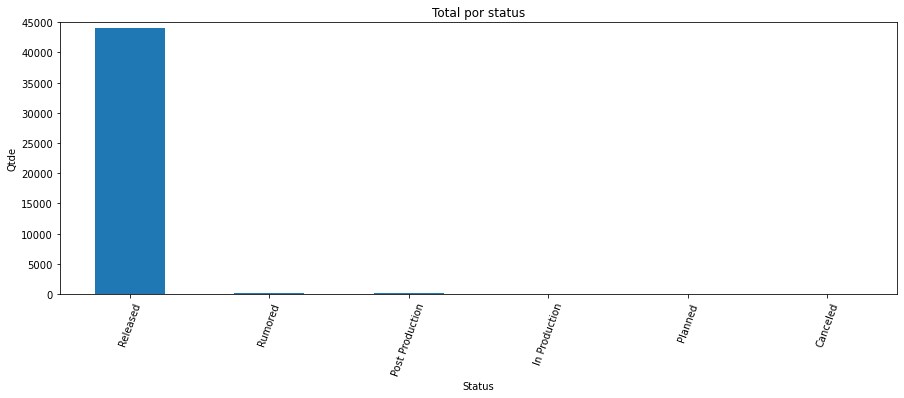

In [181]:
# visualizando os 10 maiores valores de media de votos
df.groupby(by='status').size().sort_values(ascending = False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 45000)

plt.xticks(rotation=70)

plt.ylabel('Qtde')
plt.xlabel('Status')
plt.title('Total por status')

Na época de disponibilização do dataset, foram avaliados filmes lançados e ainda não lançados

Released           44010 #  já lançados

Rumored              214 # rumores da mídia sobre o lançamento

Post Production       96 # avaliados pós produção, mas ainda não lançados

In Production         16 # avaliados ainda em produção

Planned               12 # avaliação do projeto do filme

Canceled               1 # avaliação do filme antes de concluir a produção e ser lançado. Este filme, teve problemas para ser concluído, tendo sido lançado alguns anos depois, não estando, atualmente, cancelado.

Feature data de lançamento do filmes

In [182]:
# Converter a data de lançamento para ter somente o ano
data = df['data_lancamento'] # se o resultado for uma lista das datas do banco
ano = [a.split('-')[0] for a in data]
df['ano_lancamento'] = ano

# validando a transformação
df[['data_lancamento','ano_lancamento']].head(2)

,data_lancamento,ano_lancamento
0,1995-10-30,1995
1,1995-12-15,1995


In [183]:
df.groupby(by='ano_lancamento').size().sort_values(ascending = False).head(10)

ano_lancamento
2014    1916
2015    1855
2013    1851
2012    1679
2011    1629
2016    1576
2009    1550
2010    1458
2008    1432
2007    1287
dtype: int64

Text(0.5, 1.0, 'Os 10 anos de lançamento mais frequentes')

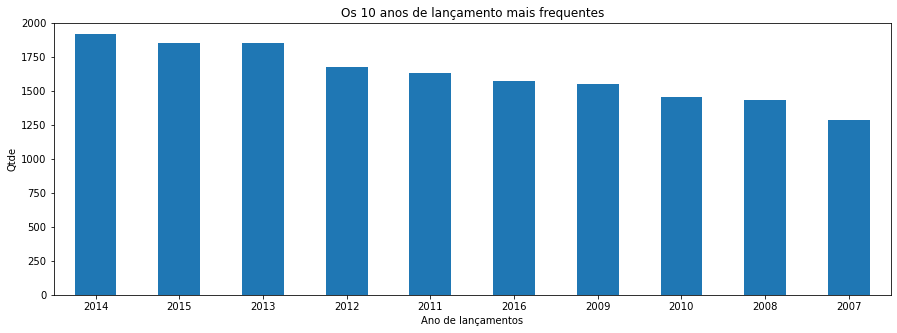

In [184]:
# visualizando os 10 anos mais frequentes
df.groupby(by='ano_lancamento').size().sort_values(ascending = False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 2000)

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Ano de lançamentos')
plt.title('Os 10 anos de lançamento mais frequentes')

Conforme observamos, os anos de lançamento mais comuns são 2014, 2015, 2013 e 2012.

In [ ]:
############### Feature despesas #######################

In [186]:
df.despesas.describe()

count     44349
unique     1204
top           0
freq      35514
Name: despesas, dtype: object

In [187]:
# os 10 maiores despesas
df.groupby(by='despesas').size().sort_values(ascending = False).head(10)

despesas
0           35514
5000000       283
10000000      259
20000000      243
2000000       241
15000000      225
3000000       223
25000000      206
1000000       195
30000000      189
dtype: int64

In [191]:
# retirada da feature despesas
df = df[['genero', 'id', 'imdb_id', 'lingua_original',
       'titulo_original', 'descricao', 'popularidade', 'cia_producao',
       'pais_producao', 'data_lancamento', 'receita', 'duracao',
       'idiomas_falados', 'status', 'titulo', 'video', 'media_votos',
       'qtde_votos', 'novo_genero', 'index', 'acao', 'aventura', 'animacao',
       'comedia', 'crime', 'documentario', 'drama', 'familia', 'fantasia',
       'estrangeiro', 'historia', 'horror', 'musical', 'misterio', 'romance',
       'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra', 'ocidental',
       'novo_pais_producao', 'novo_idiomas_falados', 'novo_cia_producao',
       'ano_lancamento']]

Conforme observamos, 75% dos filmes não possui informação de despesas. Portanto, a feature não será utilizada ma análise/predição

In [ ]:
################# Feature original_language ################

In [216]:
df.lingua_original.describe()

count     44349
unique       89
top          en
freq      32062
Name: lingua_original, dtype: object

In [220]:
df.lingua_original.value_counts(normalize=True)


en    0.722948
fr    0.051365
ja    0.030328
it    0.028501
de    0.021692
        ...   
mt    0.000023
si    0.000023
lb    0.000023
tg    0.000023
la    0.000023
Name: lingua_original, Length: 89, dtype: float64

In [219]:
df.groupby(by='lingua_original').size().sort_values(ascending = False).head(10)

lingua_original
en    32062
fr     2278
ja     1345
it     1264
de      962
es      924
ru      782
hi      506
ko      444
zh      406
dtype: int64

Text(0.5, 1.0, 'Os 10 idiomas originais mais frequentes')

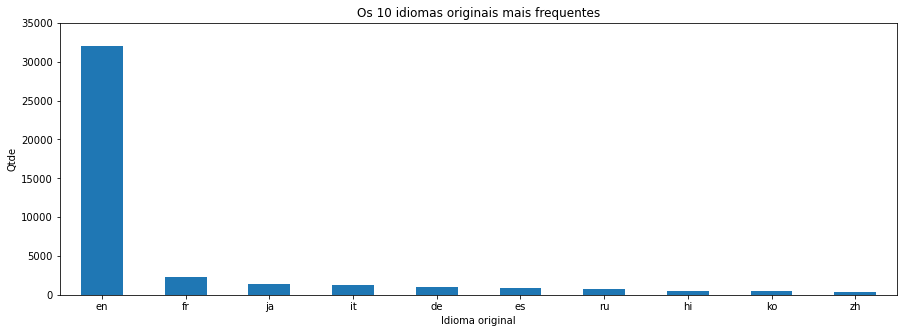

In [221]:
# visualizando os 10 idiomas originais mais frequentes
dataset.groupby(by='lingua_original').size().sort_values(ascending = False).head(10).plot.bar()

plt.rcParams['figure.figsize'] = [15, 5]
plt.ylim(0, 35000)

plt.xticks(rotation=0)

plt.ylabel('Qtde')
plt.xlabel('Idioma original')
plt.title('Os 10 idiomas originais mais frequentes')

O idioma mais frequente é o inglês(en), com 32062, seguindo do francês(fr) com 2278, japonês (ja) com 1345 e o italiano com 1264.

In [ ]:
############# Feature popularidade ##############

In [228]:
df.popularidade.describe()

count     44349
unique    43218
top       1e-06
freq         28
Name: popularidade, dtype: object

In [230]:
df.popularidade.head(3)

0    21.9469
1    17.0155
2    11.7129
Name: popularidade, dtype: object

In [229]:
df.popularidade.unique()

array([21.946943, 17.015539, 11.7129, ..., '0.903007', '0.003503',
       '0.163015'], dtype=object)

In [227]:
# qtde de registros únicos de popularidade
x = df.popularidade
len(x.unique())

43218

In [ ]:
########### Feature receitas #############

In [233]:
df.receita.head(3)

0    373554033.0
1    262797249.0
2            0.0
Name: receita, dtype: float64

In [234]:
df.receita.describe()

count    4.434900e+04
mean     1.148832e+07
std      6.510850e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: receita, dtype: float64

In [235]:
# qtde de registros únicos de receita
len(df.receita.unique())

6844

In [237]:
# retirada da feature receita
df = df[['genero', 'id', 'imdb_id', 'lingua_original', 'titulo_original',
       'descricao', 'popularidade', 'cia_producao', 'pais_producao',
       'data_lancamento', 'duracao', 'idiomas_falados', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'novo_genero', 'index',
       'acao', 'aventura', 'animacao', 'comedia', 'crime', 'documentario',
       'drama', 'familia', 'fantasia', 'estrangeiro', 'historia', 'horror',
       'musical', 'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv',
       'suspense', 'gerra', 'ocidental', 'novo_pais_producao',
       'novo_idiomas_falados', 'novo_cia_producao', 'ano_lancamento']]

Conforme observamos, 75% dos filmes não possui valor de receita. A feature não será utilizada na análise/predição

################### duração #################


In [238]:
df.duracao.head(3)

0     81.0
1    104.0
2    101.0
Name: duracao, dtype: float64

In [239]:
df.duracao.describe()

count    44349.000000
mean        95.069945
std         37.482159
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: duracao, dtype: float64

In [240]:
# qtde de registros únicos
len(df.duracao.unique())

353

In [241]:
# os 10 anos de lançamento mais frequentes
df.groupby(by='duracao').size().sort_values(ascending = False).head(10)

duracao
90.0     2527
100.0    1453
95.0     1393
93.0     1207
0.0      1118
96.0     1092
92.0     1070
94.0     1049
91.0     1048
97.0     1024
dtype: int64

In [242]:
# muitos registros possuem duração zero. Estes casos serão substituidos pela média
df['duracao'].replace(0,df['duracao'].mean(), inplace=True)

In [243]:
# verificando o impacto da atualização dos valores zerados de duração
df.groupby(by='duracao').size().sort_values(ascending = False).head(10)

duracao
90.000000     2527
100.000000    1453
95.000000     1393
93.000000     1207
95.069945     1118
96.000000     1092
92.000000     1070
94.000000     1049
91.000000     1048
97.000000     1024
dtype: int64

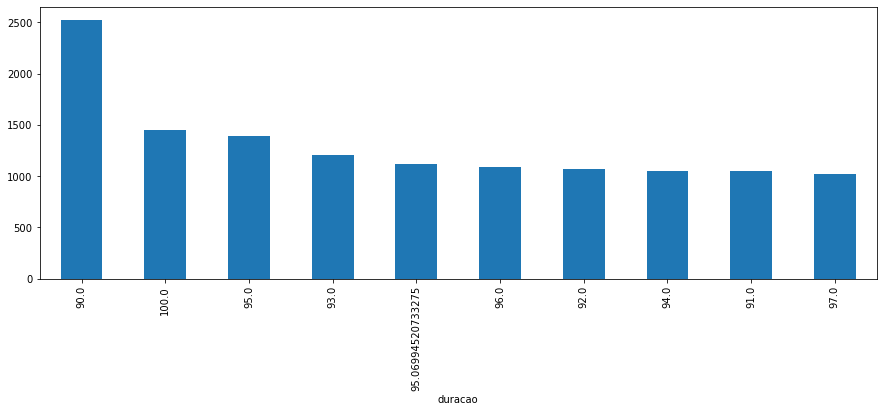

In [245]:
df.groupby(by='duracao').size().sort_values(ascending = False).head(10).plot.bar()

75% dos filmes, tem duração de 107 minutos.
1118 filmes estão com duração zero. Para estes, o valor foi atualizado pela média, 95.069945.
As durações mais frequentes são:
90 minutos, com 2527, seguido de 100 minutos com 1453, 95 minutos com 1393, 93 minutos com 1207.
95.069945     1118

Devido a grande variedade de registros únicos de popularidade, não vi ganho em agrupar, contabilizar e plotar

In [246]:
df.columns

Index(['genero', 'id', 'imdb_id', 'lingua_original', 'titulo_original',
       'descricao', 'popularidade', 'cia_producao', 'pais_producao',
       'data_lancamento', 'duracao', 'idiomas_falados', 'status', 'titulo',
       'video', 'media_votos', 'qtde_votos', 'novo_genero', 'index', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'novo_pais_producao', 'novo_idiomas_falados',
       'novo_cia_producao', 'ano_lancamento'],
      dtype='object')

In [254]:
# seleção das features que serão utilizada. Foram ordenadas de forma mais intuitiva
df.columns

Index(['genero', 'id', 'imdb_id', 'lingua_original', 'titulo_original',
       'descricao', 'popularidade', 'cia_producao', 'pais_producao',
       'data_lancamento', 'duracao', 'idiomas_falados', 'status', 'titulo',
       'video', 'media_votos', 'qtde_votos', 'novo_genero', 'index', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'novo_pais_producao', 'novo_idiomas_falados',
       'novo_cia_producao', 'ano_lancamento'],
      dtype='object')

In [255]:
# seleção das features que serão utilizada. Foram ordenadas de forma mais intuitiva
df = df[['titulo_original',
       'descricao', 'popularidade', 
       'duracao', 'status', 'titulo',
       'video', 'media_votos', 'qtde_votos', 'acao',
       'aventura', 'animacao', 'comedia', 'crime', 'documentario', 'drama',
       'familia', 'fantasia', 'estrangeiro', 'historia', 'horror', 'musical',
       'misterio', 'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense',
       'gerra', 'ocidental', 'novo_pais_producao', 'novo_idiomas_falados',
       'novo_cia_producao', 'ano_lancamento']]

-------------- ALTERAÇÃO DO TIPOS DAS FEATURES ---------------



In [256]:
df.dtypes

titulo_original          object
descricao                object
popularidade             object
duracao                 float64
status                   object
titulo                   object
video                    object
media_votos             float64
qtde_votos              float64
acao                       bool
aventura                   bool
animacao                   bool
comedia                    bool
crime                      bool
documentario               bool
drama                      bool
familia                    bool
fantasia                   bool
estrangeiro                bool
historia                   bool
horror                     bool
musical                    bool
misterio                   bool
romance                    bool
ficcao_cientifica          bool
filmes_tv                  bool
suspense                   bool
gerra                      bool
ocidental                  bool
novo_pais_producao       object
novo_idiomas_falados     object
novo_cia

In [257]:
# converter variáveis object para categoricas
df.status = df.status.astype('category')

#df.adulto = df.adulto.astype('category')
#df.titulo_original = df.titulo_original.astype('category')
#df.titulo = df.titulo.astype('category')

# converter variáveis objecto para float ou inteiro
df.popularidade = df.popularidade.astype('float64')
df.ano_lancamento = df.ano_lancamento.astype('int64')
#df.despesas = df.despesas.astype('float64')
#df.receita = df.receita.astype('float64')
#df.qtde_votos = df.qtde_votos.astype('int64')
#df.id = df.id.astype('int64')


In [258]:
df.dtypes

titulo_original           object
descricao                 object
popularidade             float64
duracao                  float64
status                  category
titulo                    object
video                     object
media_votos              float64
qtde_votos               float64
acao                        bool
aventura                    bool
animacao                    bool
comedia                     bool
crime                       bool
documentario                bool
drama                       bool
familia                     bool
fantasia                    bool
estrangeiro                 bool
historia                    bool
horror                      bool
musical                     bool
misterio                    bool
romance                     bool
ficcao_cientifica           bool
filmes_tv                   bool
suspense                    bool
gerra                       bool
ocidental                   bool
novo_pais_producao        object
novo_idiom

# devido ao conteúdo das features: overview (visão geral), titulo, titulo original, não foram analisadas

In [259]:
print('Tamanho original do dataset:', filmes.shape)
print('Tamanho final do dataset:', df.shape)

Tamanho original do dataset: (45466, 24)
Tamanho final do dataset: (44349, 33)


In [260]:
print ('Features originais', filmes.columns)
print ('Features finais', df.columns)

Features originais Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
Features finais Index(['titulo_original', 'descricao', 'popularidade', 'duracao', 'status',
       'titulo', 'video', 'media_votos', 'qtde_votos', 'acao', 'aventura',
       'animacao', 'comedia', 'crime', 'documentario', 'drama', 'familia',
       'fantasia', 'estrangeiro', 'historia', 'horror', 'musical', 'misterio',
       'romance', 'ficcao_cientifica', 'filmes_tv', 'suspense', 'gerra',
       'ocidental', 'novo_pais_producao', 'novo_idiomas_falados',
       'novo_cia_producao', 'ano_lancamento'],
      dtype='object')


### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

***---> Comente brevemente sua decisão aqui.***

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


***---> Comente brevemente sua decisão aqui.***

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

### 6) Conclusões **10%**

*Partindo das suas hipoteses e investigações, o que você consegue concluir? Suas hipoteses se concretizaram?*